In [1]:
# kaggle setting / upload API Token 
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list


# download dataset dari https://www.kaggle.com/sshikamaru/fruit-recognition
!kaggle datasets download -d sshikamaru/fruit-recognition

Saving kaggle.json to kaggle.json
ref                                                    title                                              size  lastUpdated          downloadCount  
-----------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
shivan118/healthcare-analytics                         Healthcare Analytics                                2MB  2020-09-13 17:40:05           1423  
datatattle/covid-19-nlp-text-classification            Coronavirus tweets NLP - Text Classification        4MB  2020-09-08 11:40:11            841  
anmolkumar/health-insurance-cross-sell-prediction      Health Insurance Cross Sell Prediction 🏠 🏥          6MB  2020-09-11 18:39:31           1946  
Cornell-University/arxiv                               arXiv Dataset                                     888MB  2020-09-22 15:33:49           3016  
nipunarora8/age-gender-and-ethnicity-face-data-csv     AGE, GENDER AND E

In [2]:
# ekstrak file zip
import os
import zipfile
fz = '/content/fruit-recognition.zip'
ekstrak = zipfile.ZipFile(fz, 'r')
ekstrak.extractall('/content')

!rm -rf /content/test/
path = '/content/train/train'

In [3]:
!pip install split-folders


In [4]:
# menggunakan split_folders untuk memisahkan train sama validasi
import splitfolders
splitfolders.ratio(path,
                   output='/content/dataset',
                   seed=13,
                   ratio=(.8, .2))

Copying files: 16854 files [00:02, 7619.09 files/s]


In [5]:
# mendefinisikan path dataset
main_dir = '/content/dataset'
tr = os.path.join(main_dir, 'train')
va = os.path.join(main_dir, 'val')

# join path nya train
applebraeburn_tr = os.path.join(tr, 'Apple Braeburn')
applegrannysmith_tr = os.path.join(tr, 'Apple Granny Smith')
apricot_tr = os.path.join(tr, 'Apricot')
avocado_tr = os.path.join(tr, 'Avocado')
banana_tr = os.path.join(tr, 'Banana')
blueberry_tr = os.path.join(tr, 'Blueberry')
cactusfruit_tr = os.path.join(tr, 'Cactus fruit')
cantaloupe_tr = os.path.join(tr, 'Cantaloupe')
cherry_tr = os.path.join(tr, 'Cherry')
celementine_tr = os.path.join(tr, 'Clementine')
corn_tr = os.path.join(tr, 'Corn')
cucumberripe_tr = os.path.join(tr, 'Cucumber Ripe')
grapeblue_tr = os.path.join(tr, 'Grape Blue')
kiwi_tr = os.path.join(tr, 'Kiwi')
lemon_tr = os.path.join(tr, 'Lemon')
limes_tr = os.path.join(tr, 'Limes')
manggo_tr = os.path.join(tr, 'Manggo')
onionwhite_tr = os.path.join(tr, 'Onion White')
orange_tr = os.path.join(tr, 'Orange')
papaya_tr = os.path.join(tr, 'Papaya')
passionfruit_tr = os.path.join(tr, 'Passion Fruit')
peach_tr = os.path.join(tr, 'Peach')
pear_tr = os.path.join(tr, 'Pear')
peppergreen_tr = os.path.join(tr, 'Pepper Green')
pepperred_tr = os.path.join(tr, 'Pepper Red')
pineapple_tr = os.path.join(tr, 'Pineapple')
plum_tr = os.path.join(tr, 'Plum')
pomegranate_tr = os.path.join(tr, 'Pomegranate')
potato_tr = os.path.join(tr, 'Potato Red')
raspberry_tr = os.path.join(tr, 'Raspberry')
strawberry_tr = os.path.join(tr, 'Strawberry')
tomato_tr = os.path.join(tr, 'Tomato')
watermelon_tr = os.path.join(tr, 'Watermelon')

# join path nya val
applebraeburn_va = os.path.join(va, 'Apple Braeburn')
applegrannysmith_va = os.path.join(va, 'Apple Granny Smith')
apricot_va = os.path.join(va, 'Apricot')
avocado_va = os.path.join(va, 'Avocado')
banana_va = os.path.join(va, 'Banana')
blueberry_va = os.path.join(va, 'Blueberry')
cactusfruit_va = os.path.join(va, 'Cactus fruit')
cantaloupe_va = os.path.join(va, 'Cantaloupe')
cherry_va = os.path.join(va, 'Cherry')
celementine_va = os.path.join(va, 'Clementine')
corn_va = os.path.join(va, 'Corn')
cucumberripe_va = os.path.join(va, 'Cucumber Ripe')
grapeblue_va = os.path.join(va, 'Grape Blue')
kiwi_va = os.path.join(va, 'Kiwi')
lemon_va = os.path.join(va, 'Lemon')
limes_va = os.path.join(va, 'Limes')
manggo_va = os.path.join(va, 'Manggo')
onionwhite_va = os.path.join(va, 'Onion White')
orange_va = os.path.join(va, 'Orange')
papaya_va = os.path.join(va, 'Papaya')
passionfruit_va = os.path.join(va, 'Passion Fruit')
peach_va = os.path.join(va, 'Peach')
pear_va = os.path.join(va, 'Pear')
peppergreen_va = os.path.join(va, 'Pepper Green')
pepperred_va = os.path.join(va, 'Pepper Red')
pineapple_va = os.path.join(va, 'Pineapple')
plum_va = os.path.join(va, 'Plum')
pomegranate_va = os.path.join(va, 'Pomegranate')
potato_va = os.path.join(va, 'Potato Red')
raspberry_va = os.path.join(va, 'Raspberry')
strawberry_va = os.path.join(va, 'Strawberry')
tomato_va = os.path.join(va, 'Tomato')
watermelon_va = os.path.join(va, 'Watermelon')

In [6]:
# import library
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tr_idg = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    shear_range=0.2
    )
va_igd = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    fill_mode='nearest',
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

tr_generator = tr_idg.flow_from_directory(
    tr,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical',
    shuffle=True
)

va_generator = va_igd.flow_from_directory(
    va,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical',
    shuffle=True
)

Found 13471 images belonging to 33 classes.
Found 3383 images belonging to 33 classes.


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2), ### added
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),### added
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(33, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0

In [8]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92):
      print("\nAkurasi telah mencapai >92%!")
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    tr_generator,
    steps_per_epoch=35,
    epochs=100,
    validation_data=va_generator,
    validation_steps=5,
    verbose=2,
    callbacks=[callbacks])

Epoch 1/100
35/35 - 1s - loss: 3.5378 - accuracy: 0.0360 - val_loss: 3.5469 - val_accuracy: 0.1000
Epoch 2/100
35/35 - 1s - loss: 3.4051 - accuracy: 0.0786 - val_loss: 3.1612 - val_accuracy: 0.2000
Epoch 3/100
35/35 - 1s - loss: 2.6558 - accuracy: 0.1643 - val_loss: 2.5045 - val_accuracy: 0.3000
Epoch 4/100
35/35 - 1s - loss: 2.7771 - accuracy: 0.2071 - val_loss: 2.9667 - val_accuracy: 0.0500
Epoch 5/100
35/35 - 1s - loss: 2.6425 - accuracy: 0.1643 - val_loss: 1.7912 - val_accuracy: 0.4000
Epoch 6/100
35/35 - 1s - loss: 2.2663 - accuracy: 0.2643 - val_loss: 2.4535 - val_accuracy: 0.3500
Epoch 7/100
35/35 - 1s - loss: 2.1507 - accuracy: 0.3429 - val_loss: 2.0760 - val_accuracy: 0.3000
Epoch 8/100
35/35 - 1s - loss: 1.9821 - accuracy: 0.3643 - val_loss: 1.9054 - val_accuracy: 0.5500
Epoch 9/100
35/35 - 1s - loss: 1.9508 - accuracy: 0.3571 - val_loss: 1.5746 - val_accuracy: 0.4000
Epoch 10/100
35/35 - 1s - loss: 1.8268 - accuracy: 0.4214 - val_loss: 1.9875 - val_accuracy: 0.4500
Epoch 11/

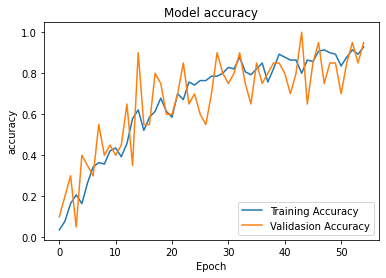

In [9]:
# liat grafik akurasi
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validasion Accuracy')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [10]:
#liat versi tf
print(tf.__version__)

2.3.0


In [11]:
model.save('/content/savemodel', include_optimizer=True)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/savemodel/assets


In [12]:
# Convert the model
saved_model_dir = '/content/savemodel'
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)